# Seaborn

Seaborn is a library built on top of matplotlib to create more advanced plot types.

## Imports

In [1]:
import seaborn as sns
%matplotlib inline

---

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* `distplot`
* `jointplot`
* `pairplot`
* `rugplot`
* `kdeplot`

## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

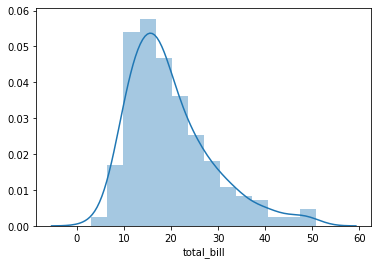

In [4]:
sns.distplot(tips['total_bill'])

To remove the `kde` (gaussian kernel density estimate) layer and just have the histogram use:

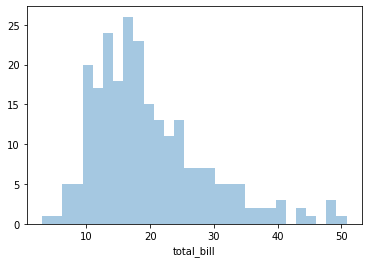

In [5]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

## jointplot

`jointplot()` allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with:

* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

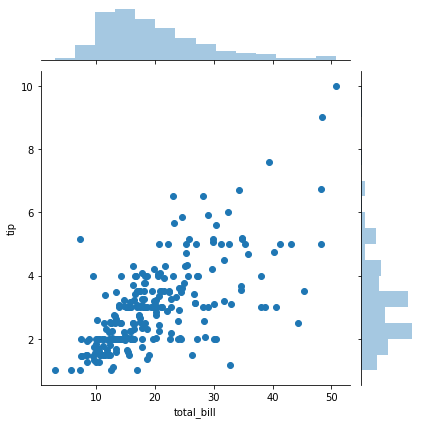

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

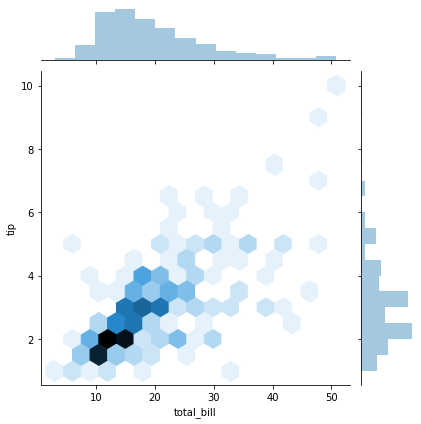

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

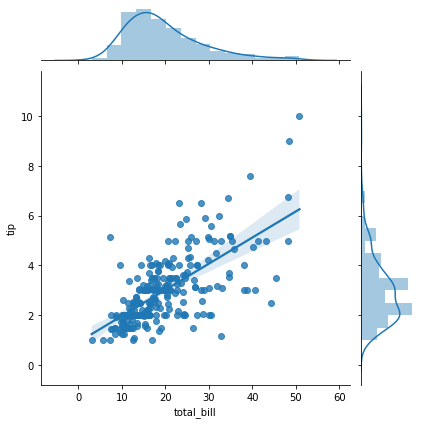

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

## pairplot

`pairplot` will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

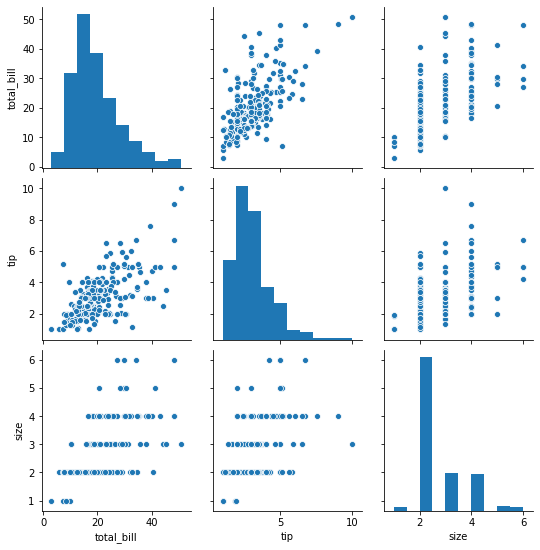

In [9]:
sns.pairplot(tips)

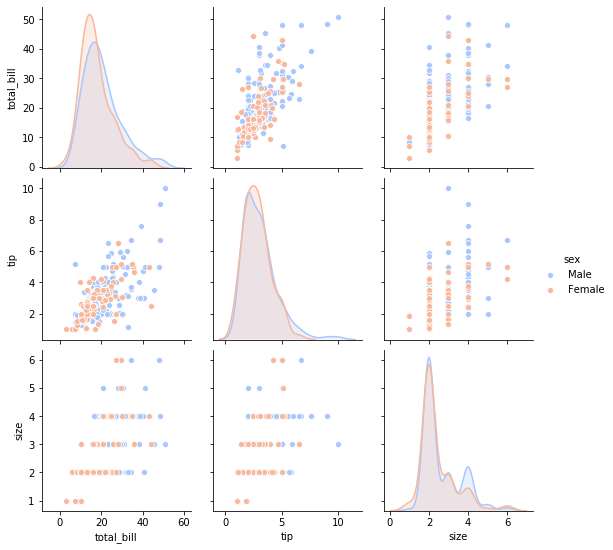

In [10]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

## rugplot

`rugplots` are a very simple concept, they just draw a dash mark for every point on a univariate distribution.

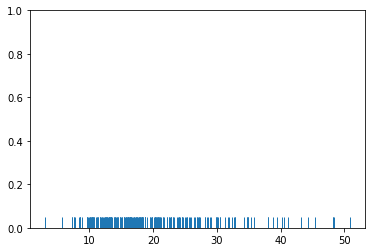

In [11]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

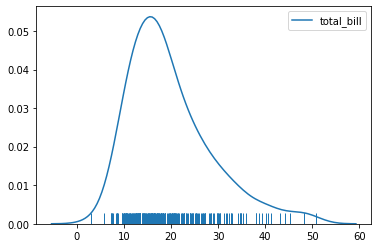

In [12]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

---

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data.

In [13]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

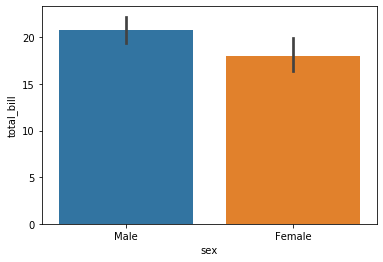

In [14]:
sns.barplot(x='sex', y='total_bill', data=tips)

In [15]:
import numpy as np

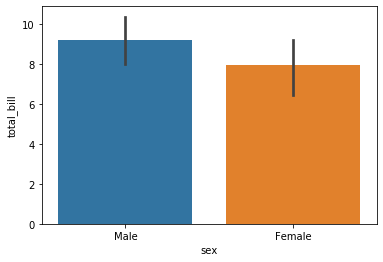

In [16]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

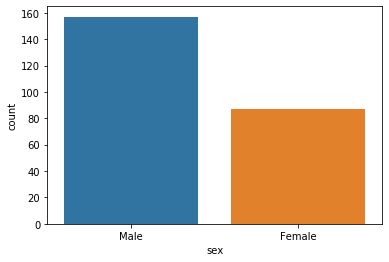

In [17]:
sns.countplot(x='sex', data=tips)

## boxplot

boxplots are used to shown the distribution of categorical data. A box plot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be outliers.

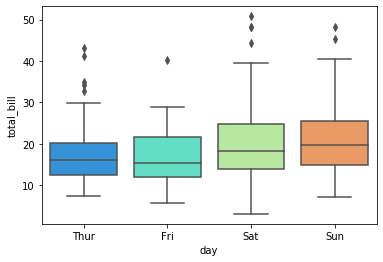

In [18]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')

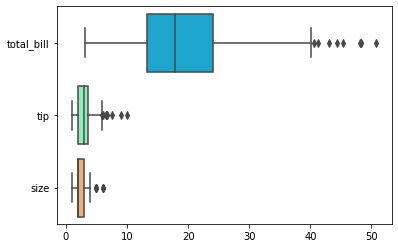

In [19]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips, palette='rainbow', orient='h')

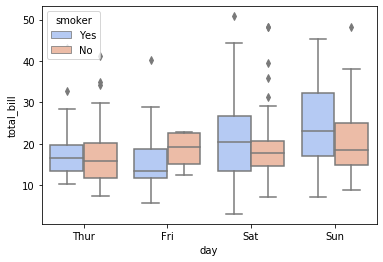

In [20]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")

## stripplot and swarmplot

The `stripplot` will draw a scatterplot where one variable is categorical. The `swarmplot` is similar to `stripplot()`, but the points are adjusted (only along the categorical axis) so that they don’t overlap.

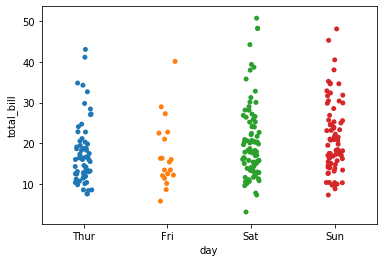

In [21]:
sns.stripplot(x="day", y="total_bill", data=tips)

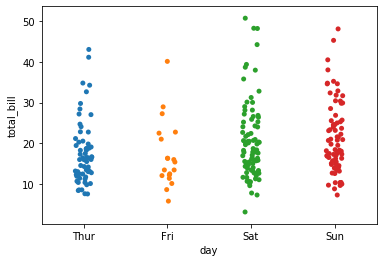

In [22]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

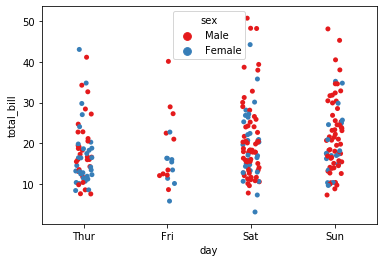

In [23]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1')

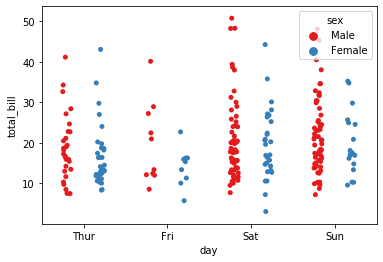

In [24]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1', dodge=True)

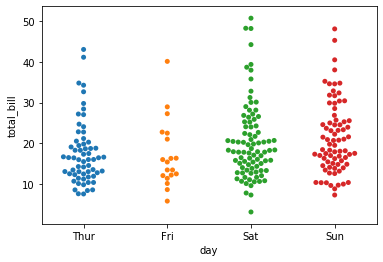

In [25]:
sns.swarmplot(x="day", y="total_bill", data=tips)

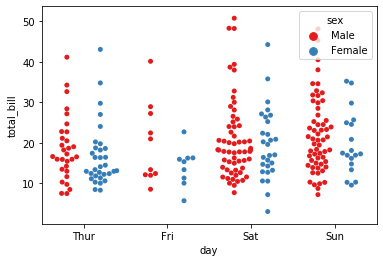

In [26]:
sns.swarmplot(x="day", y="total_bill", hue='sex', data=tips, palette="Set1", dodge=True)

## catplot

catplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

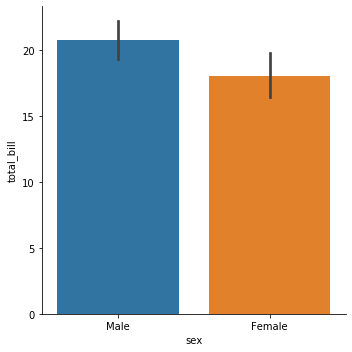

In [27]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar')

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices.

In [28]:
import seaborn as sns
%matplotlib inline

In [29]:
flights = sns.load_dataset('flights')

In [30]:
tips = sns.load_dataset('tips')

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form

In [33]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


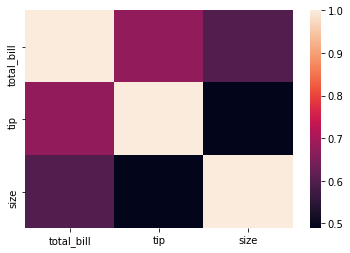

In [34]:
sns.heatmap(tips.corr())

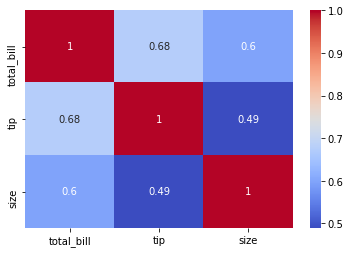

In [35]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [36]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


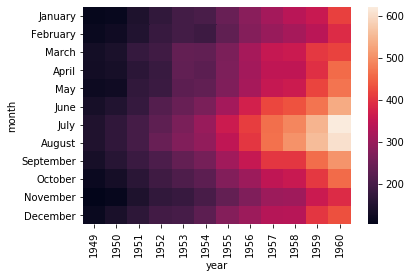

In [37]:
pvflights = flights.pivot_table(values='passengers', index='month', columns='year')
sns.heatmap(pvflights)

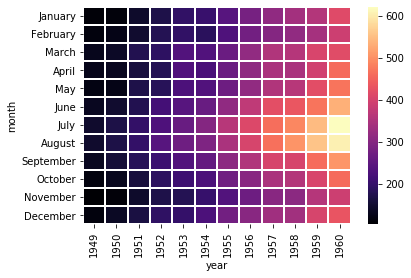

In [38]:
sns.heatmap(pvflights, cmap='magma', linecolor='white', linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.

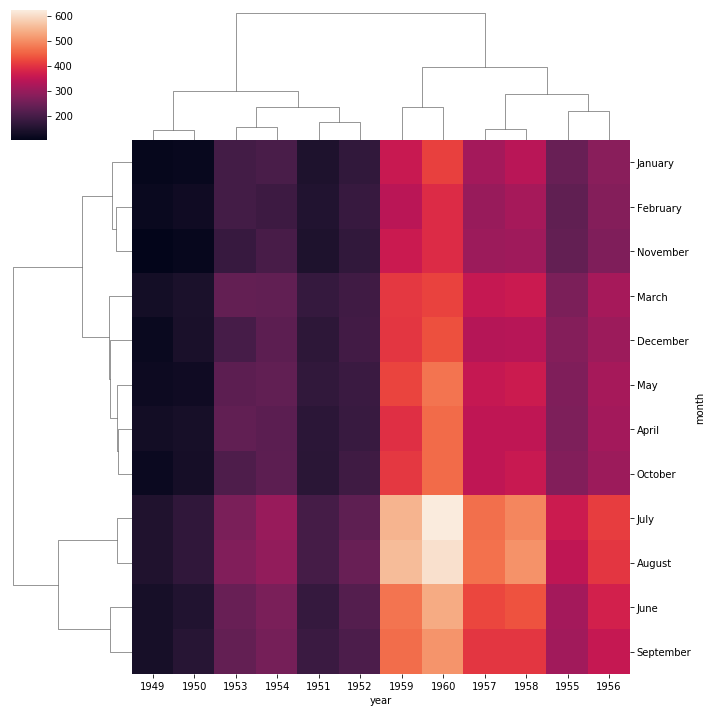

In [39]:
sns.clustermap(pvflights)

The years and months are no longer in order, but grouped by similarity in value.
We can begin to infer things from this plot.

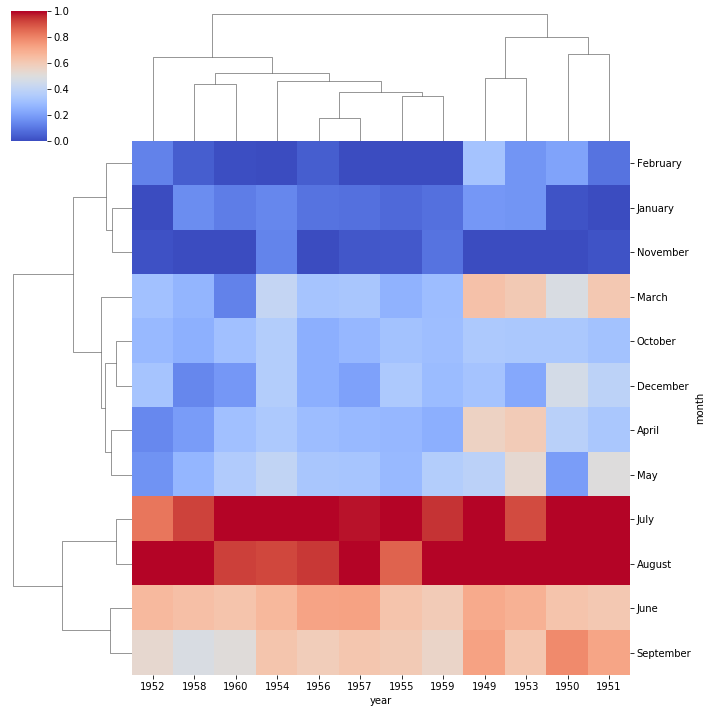

In [40]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights, cmap='coolwarm', standard_scale=1)

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
iris = sns.load_dataset('iris')

In [43]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

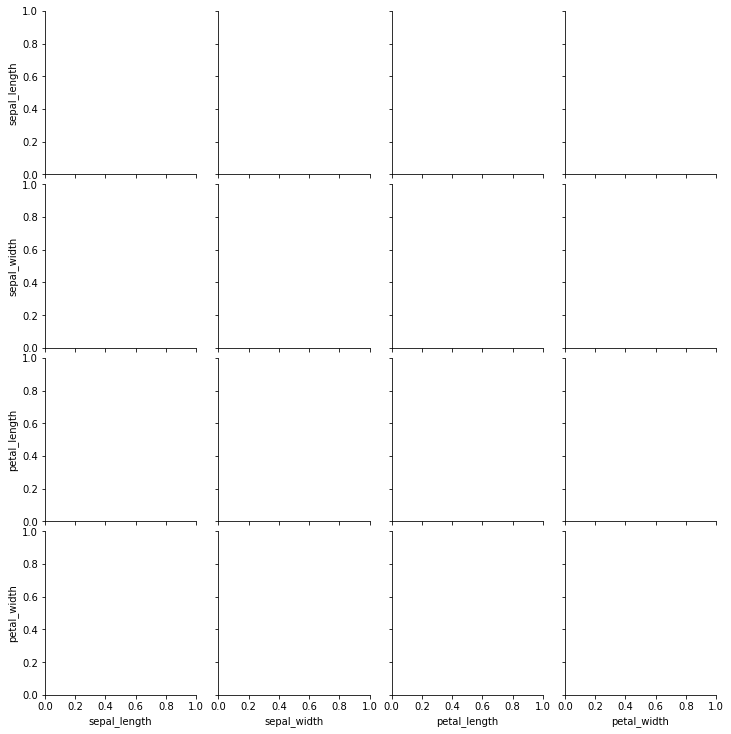

In [44]:
# Just the Grid
sns.PairGrid(iris)

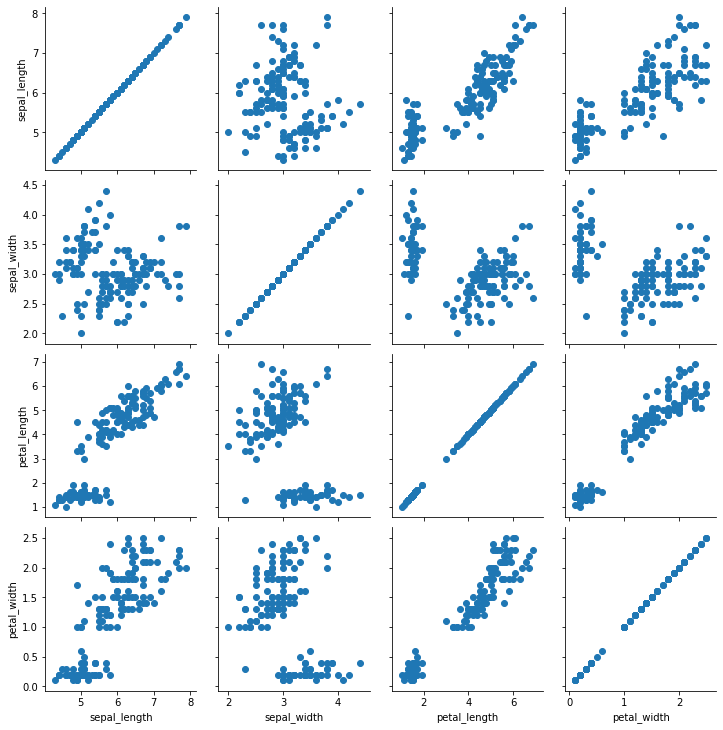

In [45]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

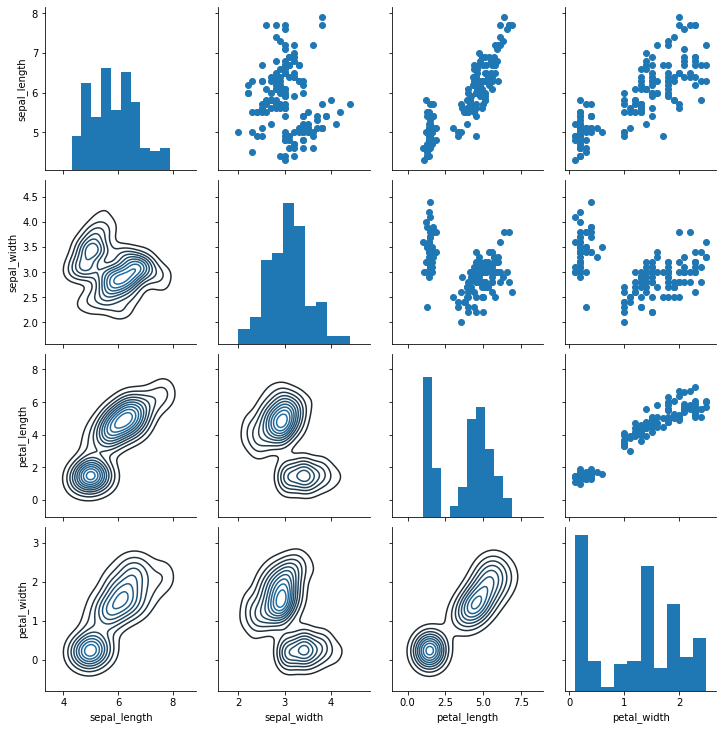

In [46]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## PairPlot

pairplot is a simpler version of PairGrid

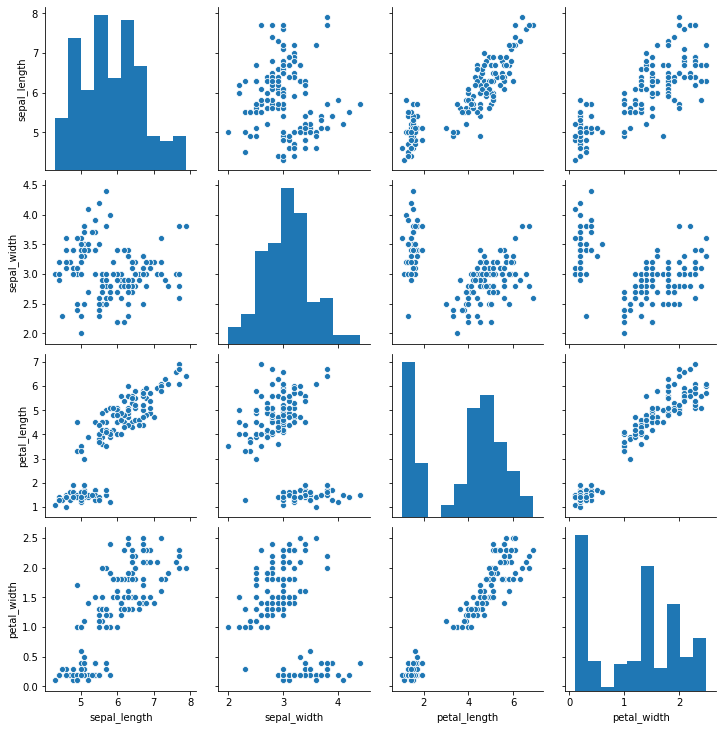

In [47]:
sns.pairplot(iris)

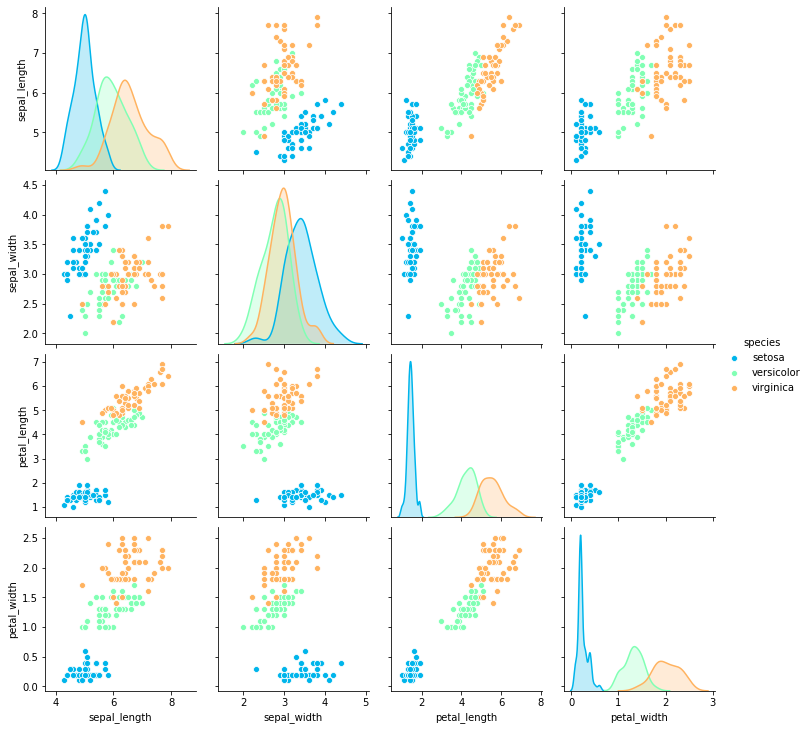

In [48]:
sns.pairplot(iris, hue='species', palette='rainbow')

# Regression Plots

**lmplot** allows you to display linear models, and it allows to split up those plots based off of features, as well as coloring the hue based off of features.

In [49]:
import seaborn as sns
%matplotlib inline

In [50]:
tips = sns.load_dataset('tips')

In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

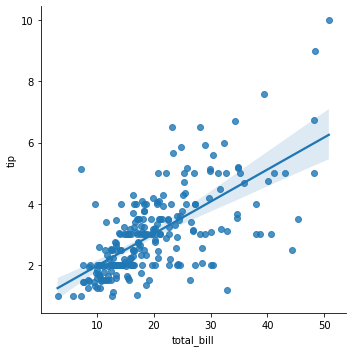

In [52]:
sns.lmplot(x='total_bill', y='tip', data=tips)

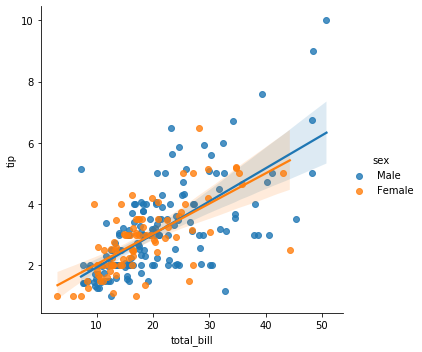

In [53]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

## Using a Grid

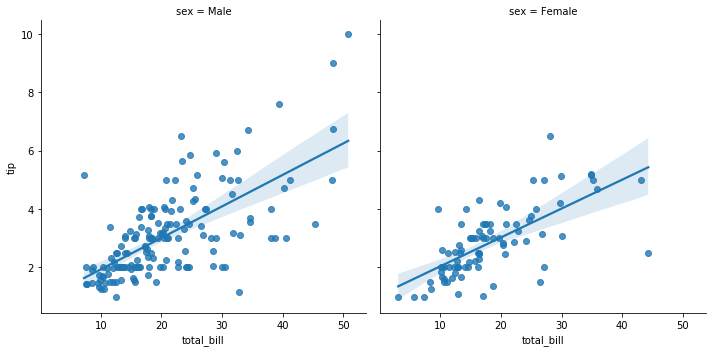

In [54]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

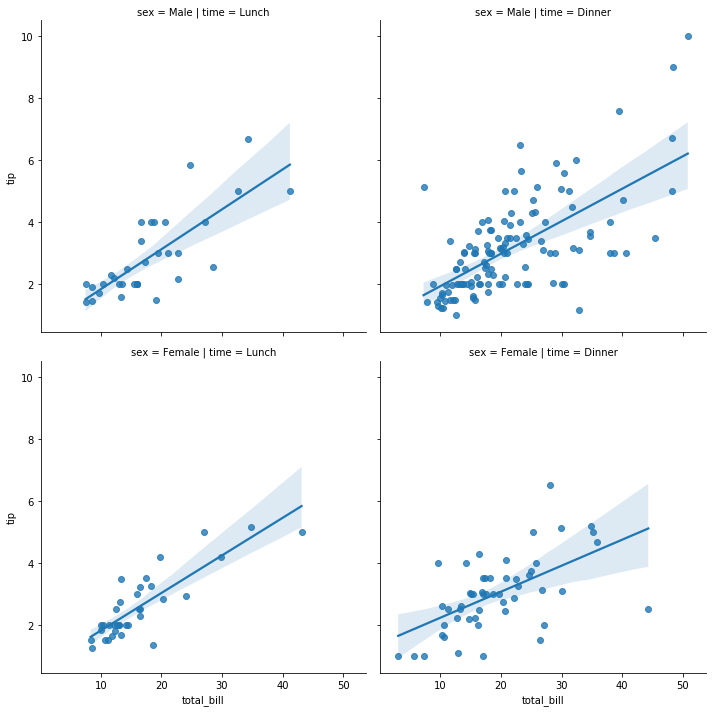

In [55]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips)

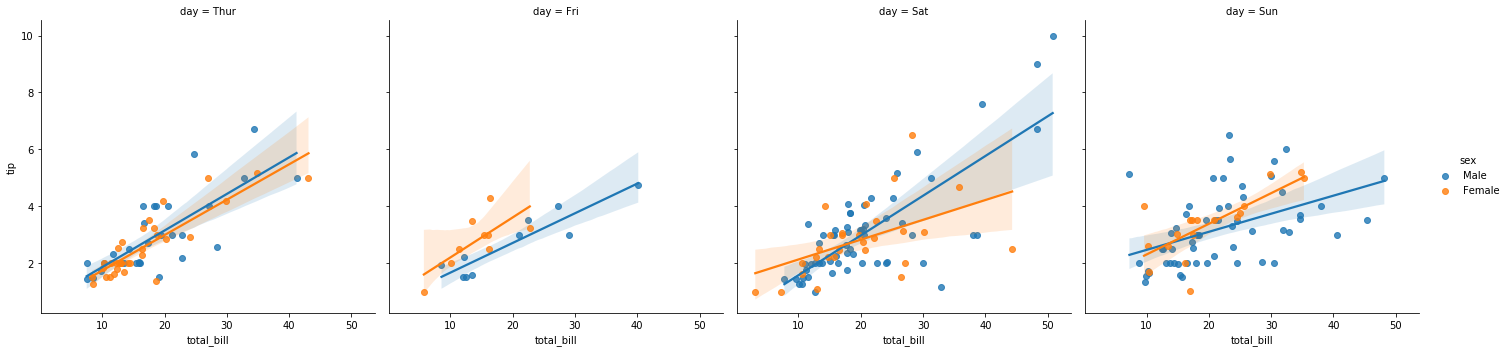

In [56]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

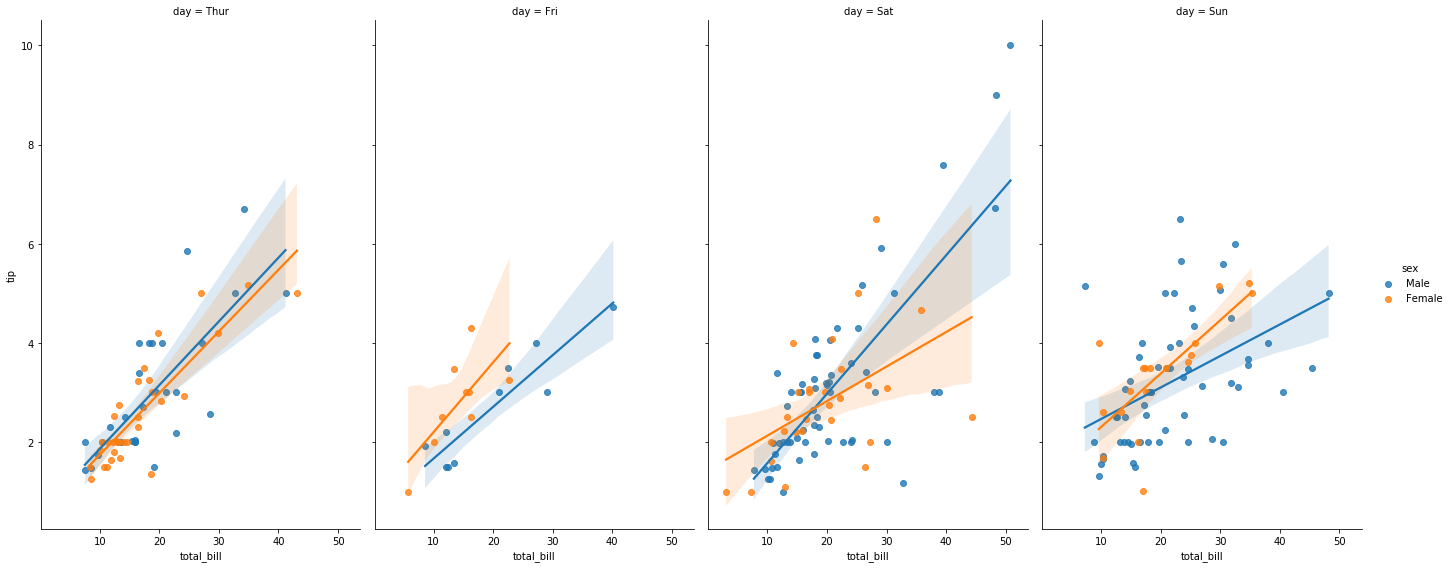

In [57]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex',
          aspect=0.6, height=8)

# Style

## Spine Removal

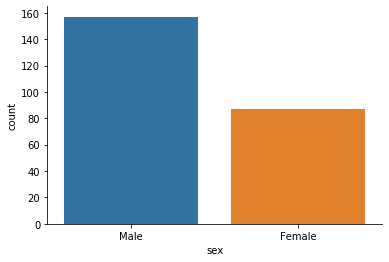

In [58]:
sns.countplot(x='sex', data=tips)
sns.despine()

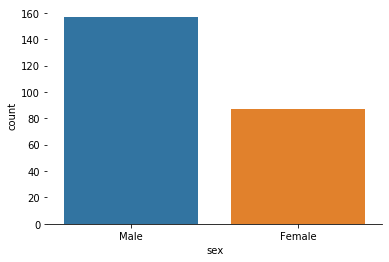

In [59]:
sns.countplot(x='sex', data=tips)
sns.despine(left=True)

## Scale and Context

The `set_context()` allows you to override default parameters:

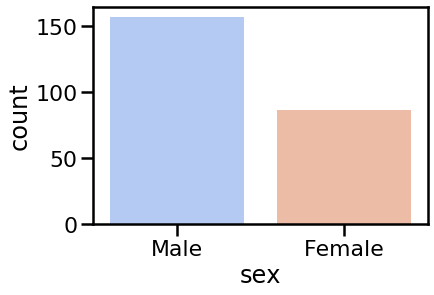

In [60]:
sns.set_context('poster', font_scale=1)
sns.countplot(x='sex', data=tips, palette='coolwarm')

Check out the documentation page for more info on these topics:
http://seaborn.pydata.org/tutorial/aesthetics.html